In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Uploading and Visualising the data

In [2]:
from pandas_profiling import ProfileReport
df = pd.read_csv('Titanic dataset.csv')
profile = ProfileReport(df)
profile.to_file(output_file = 'output.html')

# Missing value handling

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

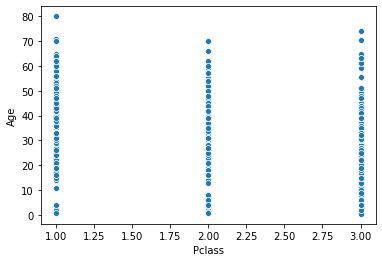

In [4]:
sns.scatterplot('Pclass', 'Age', data = df)

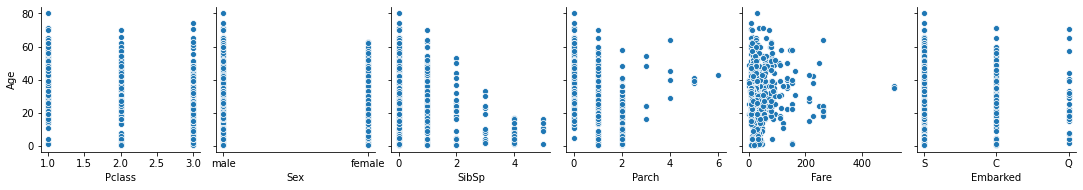

In [5]:
sns.pairplot(x_vars = ['Pclass', 'Sex', 'SibSp','Parch', 'Fare', 'Embarked'], y_vars = 'Age', data = df)

In [6]:
df.groupby('SibSp')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


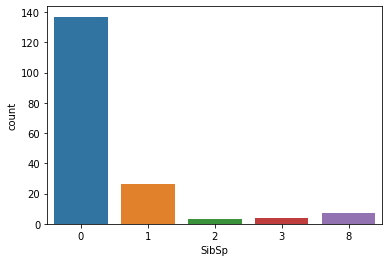

In [7]:
sns.countplot(x = 'SibSp', data = df[df['Age'].isnull()])

In [8]:
df['Age'].median()

28.0

In [9]:
df['Age'] = np.where((df['SibSp']==8) & (df['Age'].isnull()), 28.0, df['Age'])

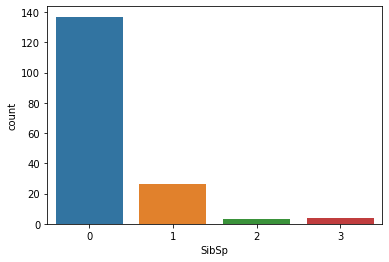

In [10]:
sns.countplot(x = 'SibSp', data = df[df['Age'].isnull()])

In [11]:
df['Age'] = np.where((df['SibSp']==0) & (df['Age'].isnull()), 29.0, df['Age'])
df['Age'] = np.where((df['SibSp']==1) & (df['Age'].isnull()), 30.0, df['Age'])
df['Age'] = np.where((df['SibSp']==2) & (df['Age'].isnull()), 23.0, df['Age'])
df['Age'] = np.where((df['SibSp']==3) & (df['Age'].isnull()), 10.0, df['Age'])

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df['Embarked'].fillna('S', inplace = True) 

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
df.drop(columns = ['Name','PassengerId','Ticket','Cabin'], inplace = True)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Outliers Handling

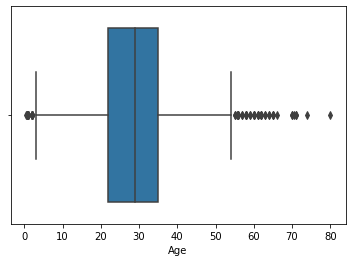

In [18]:
sns.boxplot(df['Age'])

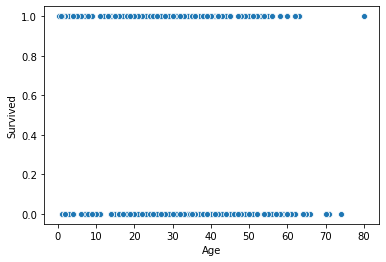

In [19]:
sns.scatterplot('Age', 'Survived', data = df)

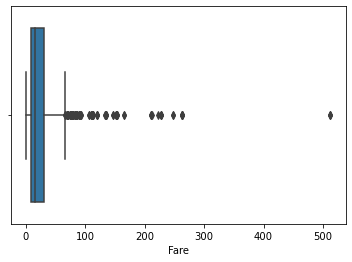

In [20]:
sns.boxplot(df['Fare'])

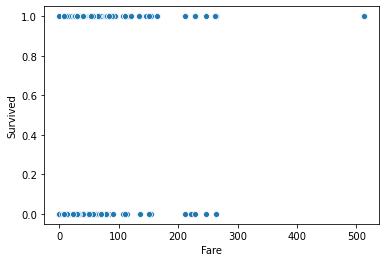

In [21]:
sns.scatterplot('Fare', 'Survived', data = df)

In [22]:
df.sort_values(by = 'Fare', ascending = False)[:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
88,1,1,female,23.0,3,2,263.0000,S
27,0,1,male,19.0,3,2,263.0000,S
341,1,1,female,24.0,3,2,263.0000,S
438,0,1,male,64.0,1,4,263.0000,S
311,1,1,female,18.0,2,2,262.3750,C
742,1,1,female,21.0,2,2,262.3750,C
118,0,1,male,24.0,0,1,247.5208,C


In [23]:
df.drop(df[df['Fare']>500].index, inplace = True)

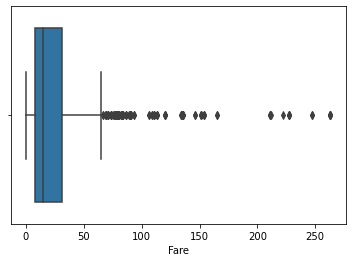

In [24]:
sns.boxplot(df['Fare'])

# Logistic Regression Model to predict chances of survival

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
num_cols = df.select_dtypes(include=[np.number]).columns

In [27]:
titanic_number = df[num_cols]

# Create dummy variable for character data

In [28]:
chara_cols = df.select_dtypes(include = 'object').columns

In [29]:
titanic_dummies = pd.get_dummies(df[chara_cols])

In [30]:
titanic_dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


# Combining numerical and dummy variables

In [31]:
titanic_combined = pd.concat([titanic_number, titanic_dummies],axis = 1)

In [32]:
titanic_combined.drop(columns=['Sex_male','Embarked_C'],inplace=True)

In [33]:
titanic_combined.shape

(888, 9)

In [34]:
x = titanic_combined.drop(columns = ['Survived'])
y = titanic_combined['Survived']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.75, random_state = 0)

In [36]:
x_train.shape

(666, 8)

In [37]:
x_test.shape

(222, 8)

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Sharad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = lr.predict(x_test)

In [40]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

# Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[111  20]
 [ 31  60]]


In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7702702702702703


# Area under ROC curve

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
area_under_roc = roc_auc_score(y_test,y_pred)
print(area_under_roc)

0.7533344518077342


# Plotting the Roc curve

In [46]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,lr.predict_proba(x_test)[:,1])
# fpr -- false positive rate, tpr-- true positive rate

In [47]:
type(pd.Series(thresholds))
fpr_Series = pd.Series(fpr)
tpr_Series = pd.Series(tpr)
thresholds_Series = pd.Series(thresholds)
df = pd.concat([fpr_Series, tpr_Series,thresholds_Series],axis = 1, keys = ['FPR', 'TPR', 'THRESHOLD'])
df.sort_values(by ='TPR', ascending = False)

,FPR,TPR,THRESHOLD
75,1.000000,1.000000,0.039194
74,0.954198,1.000000,0.048934
73,0.954198,0.978022,0.054586
72,0.870229,0.978022,0.074078
71,0.862595,0.967033,0.074644
...,...,...,...
5,0.015267,0.318681,0.809933
2,0.000000,0.131868,0.926012
3,0.007634,0.131868,0.919359
1,0.000000,0.010989,0.957827


In [48]:
lr.predict_proba(x_test)
# As the cut off value is 0.5 by default, on the basis of the result it classifies the result into 0 and 1.

array([[0.30183249, 0.69816751],
       [0.91291131, 0.08708869],
       [0.19482397, 0.80517603],
       [0.92274804, 0.07725196],
       [0.74062569, 0.25937431],
       [0.7777952 , 0.2222048 ],
       [0.74896119, 0.25103881],
       [0.05084171, 0.94915829],
       [0.44463848, 0.55536152],
       [0.67503325, 0.32496675],
       [0.93770874, 0.06229126],
       [0.06953841, 0.93046159],
       [0.27193468, 0.72806532],
       [0.68650152, 0.31349848],
       [0.26380535, 0.73619465],
       [0.92535583, 0.07464417],
       [0.37982182, 0.62017818],
       [0.45637307, 0.54362693],
       [0.86849391, 0.13150609],
       [0.04861113, 0.95138887],
       [0.6670373 , 0.3329627 ],
       [0.05190279, 0.94809721],
       [0.58082328, 0.41917672],
       [0.72618715, 0.27381285],
       [0.04217341, 0.95782659],
       [0.85471078, 0.14528922],
       [0.3515701 , 0.6484299 ],
       [0.51219595, 0.48780405],
       [0.58084324, 0.41915676],
       [0.74179929, 0.25820071],
       [0.

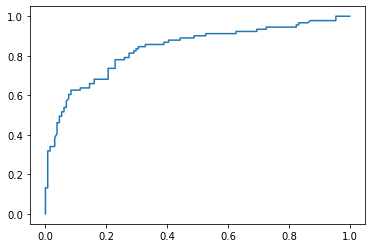

In [49]:
plt.plot(fpr,tpr)